In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [80]:
df= pd.read_csv("drive/MyDrive/healthcare-dataset-stroke-data.csv")

In [81]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [82]:
df.shape

(5110, 12)

In [83]:
df.count()

,0
id,5110
gender,5110
age,5110
hypertension,5110
heart_disease,5110
ever_married,5110
work_type,5110
Residence_type,5110
avg_glucose_level,5110
bmi,4909


In [84]:
duplicate_rows_df = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_df.shape)
# Remove the duplicate rows
df = df.drop_duplicates()
df.head(5)

Number of duplicate rows:  (0, 12)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [85]:
# Find the number of missing values
print(df.isnull().sum())

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [86]:
df['bmi'] = df['bmi'].fillna(df['bmi'].median())

print("Missing values after:", df.isnull().sum())

Missing values after: id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


In [87]:
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.lower().str.strip()

# Display the cleaned categorical columns to verify
print("Cleaned categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"\n'{col}':")
    print(df[col].value_counts())

Cleaned categorical columns:

'gender':
gender
female    2994
male      2115
other        1
Name: count, dtype: int64

'ever_married':
ever_married
yes    3353
no     1757
Name: count, dtype: int64

'work_type':
work_type
private          2925
self-employed     819
children          687
govt_job          657
never_worked       22
Name: count, dtype: int64

'Residence_type':
Residence_type
urban    2596
rural    2514
Name: count, dtype: int64

'smoking_status':
smoking_status
never smoked       1892
unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64


In [88]:
df = df[df['gender'] != 'other']

# Verify the change
print("Value counts for 'gender' after removing 'other':")
print(df['gender'].value_counts())

Value counts for 'gender' after removing 'other':
gender
female    2994
male      2115
Name: count, dtype: int64


In [89]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical columns:", categorical_cols)


Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [90]:
for col in categorical_cols:
    print(f"{col} unique values:", df[col].unique())

gender unique values: ['male' 'female']
ever_married unique values: ['yes' 'no']
work_type unique values: ['private' 'self-employed' 'govt_job' 'children' 'never_worked']
Residence_type unique values: ['urban' 'rural']
smoking_status unique values: ['formerly smoked' 'never smoked' 'smokes' 'unknown']


In [91]:
binary_cols = ['gender', 'ever_married', 'Residence_type']
label_encoder = LabelEncoder()

In [92]:
for col in binary_cols:
    df[col] = label_encoder.fit_transform(df[col])
    print(f"\nEncoded {col} :", df[col].head().values)


Encoded gender : [1 0 1 0 0]

Encoded ever_married : [1 1 1 1 1]

Encoded Residence_type : [1 0 0 1 0]


In [93]:
multi_cols = ['work_type','smoking_status']

multi_cols = [col for col in multi_cols if col in df.columns]

df = pd.get_dummies(df, columns=multi_cols, prefix=multi_cols, drop_first=True, dtype=int)

print("\nEncoded DataFrame shape:", df.shape)
print("Encoded columns sample:")
print(df.head())


Encoded DataFrame shape: (5109, 17)
Encoded columns sample:
      id  gender   age  hypertension  heart_disease  ever_married  \
0   9046       1  67.0             0              1             1   
1  51676       0  61.0             0              0             1   
2  31112       1  80.0             0              1             1   
3  60182       0  49.0             0              0             1   
4   1665       0  79.0             1              0             1   

   Residence_type  avg_glucose_level   bmi  stroke  work_type_govt_job  \
0               1             228.69  36.6       1                   0   
1               0             202.21  28.1       1                   0   
2               0             105.92  32.5       1                   0   
3               1             171.23  34.4       1                   0   
4               0             174.12  24.0       1                   0   

   work_type_never_worked  work_type_private  work_type_self-employed  \
0     

In [94]:
#Calculate Q1, Q3, and IQR
num_cols = ['avg_glucose_level', 'bmi']

Q1 = df[num_cols].quantile(0.25)   # 25th percentile
Q3 = df[num_cols].quantile(0.75)   # 75th percentile
IQR = Q3 - Q1                             # Interquartile Range

print("Q1:\n", Q1)
print("\nQ3:\n", Q3)
print("\nIQR:\n", IQR)

Q1:
 avg_glucose_level    77.24
bmi                  23.80
Name: 0.25, dtype: float64

Q3:
 avg_glucose_level    114.09
bmi                   32.80
Name: 0.75, dtype: float64

IQR:
 avg_glucose_level    36.85
bmi                   9.00
dtype: float64


In [95]:
print("===== Outliers in Each Column =====")
for col in num_cols:
    lower_bound = Q1[col] - 1.5 * IQR[col]
    upper_bound = Q3[col] + 1.5 * IQR[col]
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
    print(f"{col} - Number of outliers: {len(outliers)}")
    print(outliers.values, "\n")   # Display actual outlier values

===== Outliers in Each Column =====
avg_glucose_level - Number of outliers: 627
[228.69 202.21 171.23 174.12 186.21 219.84 214.09 191.61 221.29 217.08
 193.94 233.29 228.7  208.3  189.84 195.23 211.78 212.08 196.92 252.72
 219.72 213.03 243.58 197.54 196.71 237.75 194.99 180.93 185.17 221.58
 179.12 228.56 240.09 226.98 235.63 240.59 190.32 231.61 191.82 224.1
 216.94 259.63 249.31 219.91 200.59 190.14 182.99 206.09 263.32 207.28
 194.37 199.2  221.79 239.07 169.67 223.83 231.56 221.89 195.71 203.87
 185.49 213.22 215.94 209.86 205.77 271.74 200.62 242.52 175.29 208.65
 205.33 210.4  199.86 219.73 250.89 205.35 216.58 184.4  199.84 218.46
 211.06 197.28 233.94 247.51 210.95 243.53 205.84 198.21 206.72 214.45
 190.7  203.04 242.3  220.49 218.46 216.7  234.58 235.85 243.5  182.2
 229.92 215.6  239.64 200.28 205.23 209.58 210.78 251.6  213.37 223.36
 178.29 203.81 205.26 211.03 225.47 180.63 227.1  201.76 170.05 217.3
 196.01 184.15 198.69 186.17 183.45 210.48 193.83 183.34 247.69 191.47


In [96]:
# Remove outliers (values outside Q1 - 1.5*IQR and Q3 + 1.5*IQR)
original_shape = df.shape # Capture the original shape

df_after = df[~((df[num_cols] < (Q1 - 1.5 * IQR)) |
                       (df[num_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Shape before:", original_shape)   # Original dataset size
print("Shape after :", df_after.shape)   # After outlier removal

Shape before: (5109, 17)
Shape after : (4390, 17)


In [97]:
from sklearn.preprocessing import StandardScaler
numerical_features = ['avg_glucose_level', 'bmi','age']
print("Pre-Scaling Statistics:\n", df[numerical_features].describe())
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])
print("Post-Scaling Statistics:\n", df[numerical_features].describe())

Pre-Scaling Statistics:
        avg_glucose_level          bmi          age
count        5109.000000  5109.000000  5109.000000
mean          106.140399    28.863300    43.229986
std            45.285004     7.699785    22.613575
min            55.120000    10.300000     0.080000
25%            77.240000    23.800000    25.000000
50%            91.880000    28.100000    45.000000
75%           114.090000    32.800000    61.000000
max           271.740000    97.600000    82.000000
Post-Scaling Statistics:
        avg_glucose_level           bmi           age
count       5.109000e+03  5.109000e+03  5.109000e+03
mean       -1.613289e-16 -2.169596e-16  7.231987e-17
std         1.000098e+00  1.000098e+00  1.000098e+00
min        -1.126761e+00 -2.411121e+00 -1.908332e+00
25%        -6.382516e-01 -6.576542e-01 -8.062312e-01
50%        -3.149342e-01 -9.914235e-02  7.827984e-02
75%         1.755632e-01  5.113241e-01  7.858887e-01
max         3.657189e+00  8.927967e+00  1.714625e+00


In [98]:
df = df.drop('id', axis=1)

In [99]:
print("\n--- Calculating correlation of remaining features with 'Churn'... ---")


# Calculate correlation with 'Churn' and sort the values
churn_correlation = df.corr()['stroke'].sort_values(ascending=False)

# Display the final correlation values
print("\n--- Final ranking of features by correlation with Churn: ---")
print(churn_correlation.drop('stroke'))


--- Calculating correlation of remaining features with 'Churn'... ---

--- Final ranking of features by correlation with Churn: ---
age                            0.245239
heart_disease                  0.134905
avg_glucose_level              0.131991
hypertension                   0.127891
ever_married                   0.108299
work_type_self-employed        0.062150
bmi                            0.036075
Residence_type                 0.015415
work_type_private              0.011927
gender                         0.009081
smoking_status_smokes          0.008920
work_type_govt_job             0.002660
smoking_status_never smoked   -0.004163
work_type_never_worked        -0.014885
smoking_status_unknown        -0.055924
Name: stroke, dtype: float64


In [100]:
features = df.drop('stroke', axis=1)
target = df['stroke']

print("Shape of features:", features.shape)
print("Shape of target:", target.shape)

Shape of features: (5109, 15)
Shape of target: (5109,)


In [101]:
features = df.drop('stroke', axis=1)
target = df['stroke']

print("Shape of features:", features.shape)
print("Shape of target:", target.shape)

Shape of features: (5109, 15)
Shape of target: (5109,)


In [102]:
from sklearn.feature_selection import SelectKBest, chi2
import numpy as np

# Identify categorical features after one-hot encoding.
# Assuming columns starting with the original categorical column names are the one-hot encoded ones
categorical_features_encoded = features.select_dtypes(include=np.number).columns[features.select_dtypes(include=np.number).columns.str.startswith(('gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status'))]


selector = SelectKBest(score_func=chi2, k='all')
# Apply chi2 only to the categorical features
selector.fit(features[categorical_features_encoded], target)

feature_scores = pd.Series(selector.scores_, index=categorical_features_encoded)
print("Feature scores based on Chi-squared test:")
print(feature_scores.sort_values(ascending=False))

Feature scores based on Chi-squared test:
ever_married                   20.595671
work_type_self-employed        16.570851
smoking_status_unknown         11.149320
work_type_never_worked          1.127160
Residence_type                  0.597112
smoking_status_smokes           0.343764
work_type_private               0.310847
gender                          0.246877
smoking_status_never smoked     0.055750
work_type_govt_job              0.031494
dtype: float64


In [103]:
categorical_features_encoded = features.select_dtypes(include=np.number).columns[features.select_dtypes(include=np.number).columns.str.startswith(('gender', 'ever_married', 'Residence_type', 'work_type', 'smoking_status'))]

selector = SelectKBest(score_func=chi2, k='all')
selector.fit(features[categorical_features_encoded], target)

feature_scores_chi2 = pd.Series(selector.scores_, index=categorical_features_encoded)
print("Feature scores based on Chi-squared test (Categorical Features Only):")
print(feature_scores_chi2.sort_values(ascending=False))

Feature scores based on Chi-squared test (Categorical Features Only):
ever_married                   20.595671
work_type_self-employed        16.570851
smoking_status_unknown         11.149320
work_type_never_worked          1.127160
Residence_type                  0.597112
smoking_status_smokes           0.343764
work_type_private               0.310847
gender                          0.246877
smoking_status_never smoked     0.055750
work_type_govt_job              0.031494
dtype: float64


In [104]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Fit the model to the features and target
model.fit(features, target)

# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas Series for easy viewing and sorting
feature_importance_series = pd.Series(feature_importances, index=features.columns)

# Print sorted feature importances
print("\nFeature Importances from Random Forest:")
print(feature_importance_series.sort_values(ascending=False))


Feature Importances from Random Forest:
avg_glucose_level              0.280528
age                            0.249461
bmi                            0.234664
Residence_type                 0.031472
gender                         0.031250
hypertension                   0.025307
heart_disease                  0.025267
smoking_status_never smoked    0.024202
smoking_status_smokes          0.019419
ever_married                   0.019381
smoking_status_unknown         0.016403
work_type_private              0.016323
work_type_self-employed        0.014423
work_type_govt_job             0.011871
work_type_never_worked         0.000028
dtype: float64


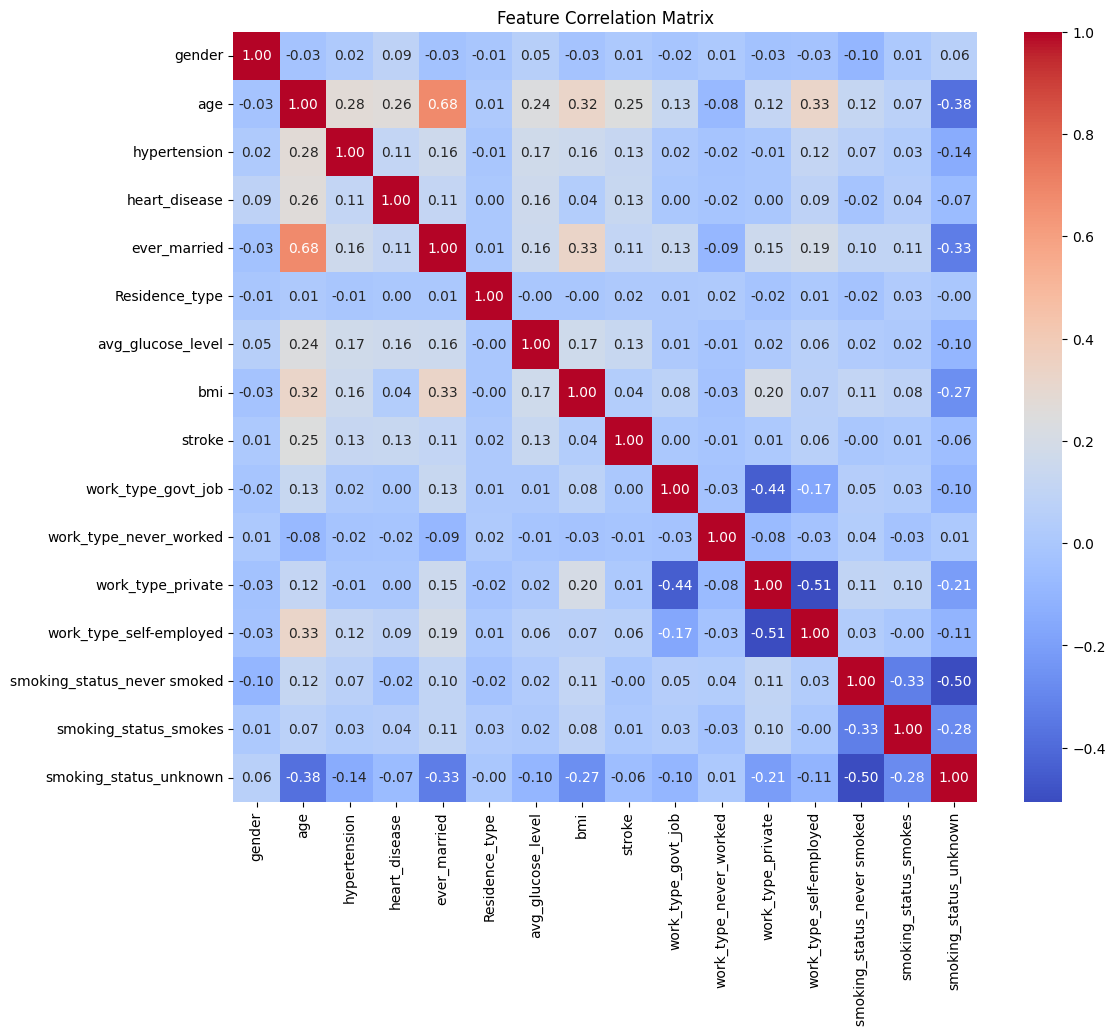

In [105]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [106]:
from sklearn.ensemble import RandomForestClassifier

# Instantiate the model
model = RandomForestClassifier(random_state=42)

# Fit the model to the features and target
model.fit(features, target)

# Get feature importances
feature_importances = model.feature_importances_

# Create a pandas Series for easy viewing and sorting
feature_importance_series = pd.Series(feature_importances, index=features.columns)

# Print sorted feature importances
print("\nFeature Importances from Random Forest:")
print(feature_importance_series.sort_values(ascending=False))


Feature Importances from Random Forest:
avg_glucose_level              0.280528
age                            0.249461
bmi                            0.234664
Residence_type                 0.031472
gender                         0.031250
hypertension                   0.025307
heart_disease                  0.025267
smoking_status_never smoked    0.024202
smoking_status_smokes          0.019419
ever_married                   0.019381
smoking_status_unknown         0.016403
work_type_private              0.016323
work_type_self-employed        0.014423
work_type_govt_job             0.011871
work_type_never_worked         0.000028
dtype: float64


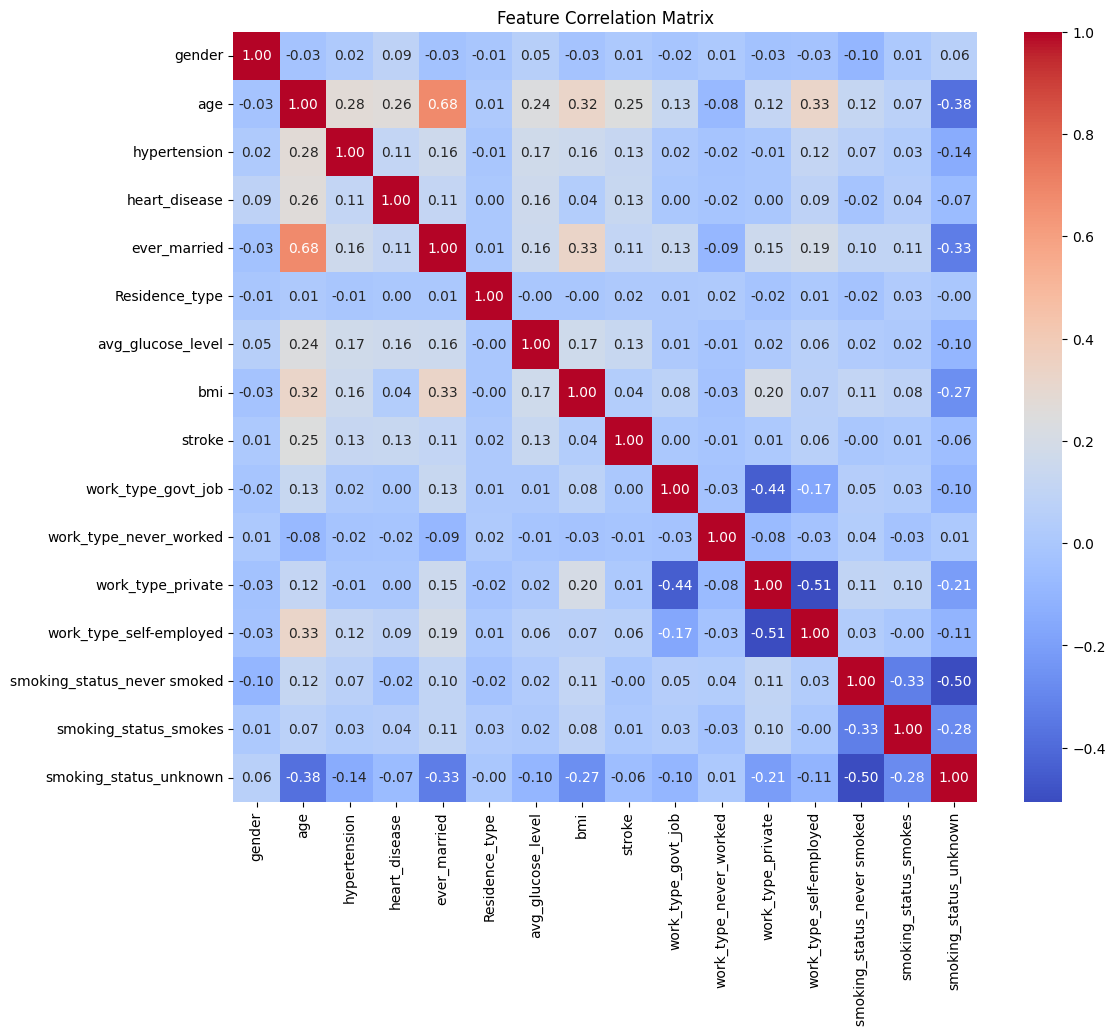

In [107]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [108]:

# Separate target variable
X = df.drop("stroke", axis=1)
y = df["stroke"]


In [109]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X)

In [110]:
# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

print("Explained Variance Ratio per component:")
print(explained_variance)

Explained Variance Ratio per component:
[0.33430987 0.17592778 0.14300884 0.06715408 0.05805764 0.05075888
 0.04721286 0.03591446 0.02849608 0.02139362 0.01580144 0.00924539
 0.00877194 0.00312096 0.00082615]


In [111]:
print("Shape of X_pca after PCA:", X_pca.shape)

Shape of X_pca after PCA: (5109, 15)


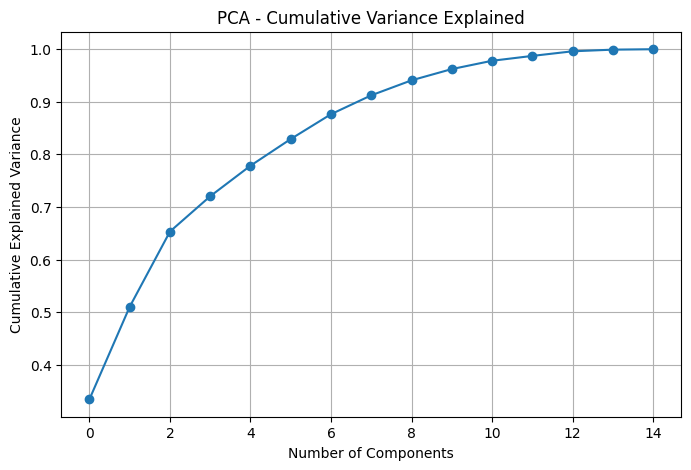

In [112]:
plt.figure(figsize=(8,5))
plt.plot(np.cumsum(explained_variance), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("PCA - Cumulative Variance Explained")
plt.grid(True)
plt.show()
plt.close()

In [113]:
# The number of features before PCA is the number of columns in the DataFrame X.
print(f"Number of features before PCA: {X.shape[1]}")

# Choose number of components
threshold = 0.9 # Using 90% variance preservation
n_components = np.argmax(np.cumsum(pca.explained_variance_ratio_) >= threshold) + 1
print(f"Number of components to preserve {threshold*100:.0f}% variance = {n_components}")


# Select the first n_components from the PCA-transformed data
X_pca_reduced = X_pca[:, :n_components]

print(f"Shape of the reduced dataset (using {n_components} components): {X_pca_reduced.shape}")

Number of features before PCA: 15
Number of components to preserve 90% variance = 8
Shape of the reduced dataset (using 8 components): (5109, 8)


In [114]:
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(len(explained_variance))],
    index=X.columns
)

print("\n🔹 PCA Feature Loadings (first 5 PCs):")
print(loadings.iloc[:, :5])


🔹 PCA Feature Loadings (first 5 PCs):
                                  PC1       PC2       PC3       PC4       PC5
gender                      -0.007228  0.056802  0.013781 -0.195009  0.277892
age                          0.638374 -0.166803 -0.634558 -0.087439  0.109199
hypertension                 0.071061  0.011075 -0.027129 -0.016026 -0.025317
heart_disease                0.039662  0.021686 -0.044040 -0.025910  0.030510
ever_married                 0.243579 -0.100766 -0.180062  0.010391  0.074977
Residence_type               0.002368 -0.004741 -0.012965 -0.088183  0.026943
avg_glucose_level            0.427880  0.881384  0.182712  0.047744 -0.016878
bmi                          0.548458 -0.403359  0.708037 -0.162286 -0.050890
work_type_govt_job           0.029583 -0.015253 -0.028970 -0.157769 -0.233636
work_type_never_worked      -0.003458  0.001445  0.003122 -0.000197 -0.008465
work_type_private            0.075431 -0.082350  0.086438  0.584524  0.598995
work_type_self-employed  

In [115]:

df = pd.DataFrame(X_pca_reduced, columns=[f'PC{i+1}' for i in range(X_pca_reduced.shape[1])])

df['stroke'] = y.values
output_path = "drive/MyDrive/final_preproccessed_dataset.csv"


df.to_csv(output_path, index=False)

print(f"PCA reduced dataset saved to: {output_path}")

PCA reduced dataset saved to: drive/MyDrive/final_preproccessed_dataset.csv
